121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3290 - loss: 1.9382   
Test Loss: 1.9327
Test Accuracy: 0.3230
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   


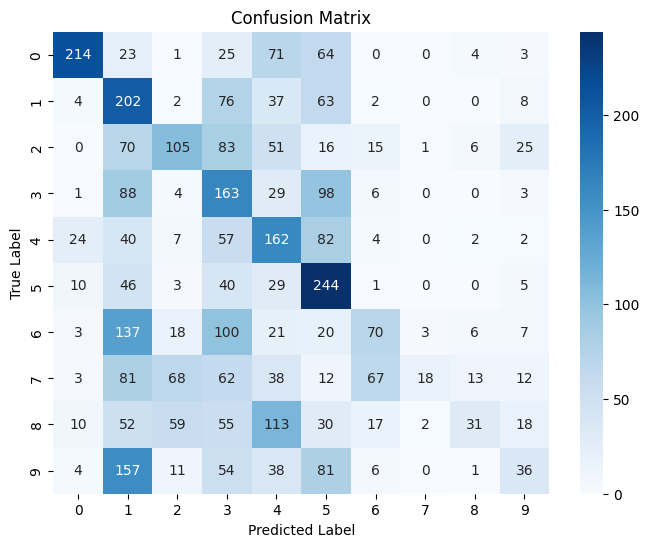

Classification Report:

              precision    recall  f1-score   support

           0     0.7839    0.5284    0.6313       405
           1     0.2254    0.5127    0.3132       394
           2     0.3777    0.2823    0.3231       372
           3     0.2280    0.4158    0.2945       392
           4     0.2750    0.4263    0.3344       380
           5     0.3437    0.6455    0.4485       378
           6     0.3723    0.1818    0.2443       385
           7     0.7500    0.0481    0.0905       374
           8     0.4921    0.0801    0.1378       387
           9     0.3025    0.0928    0.1420       388

    accuracy                         0.3230      3855
   macro avg     0.4151    0.3214    0.2959      3855
weighted avg     0.4156    0.3230    0.2977      3855



In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 🚀 データ保存先
DATA_DIR = "./data/"

# 🚀 テストデータのロード
X_test = np.load(os.path.join(DATA_DIR, "X_test.npy"))
y_test = np.load(os.path.join(DATA_DIR, "y_test.npy"))

# 🚀 RNN モデルのロード
model = tf.keras.models.load_model(os.path.join(DATA_DIR, "rnn_model.keras"))

# 🚀 RNN に適した形にリシェイプ
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 🚀 モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 🚀 予測結果の取得
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 🚀 混同行列の作成
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# 🚀 混同行列の可視化
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 🚀 精度指標の計算（Precision, Recall, F1-score）
report = classification_report(y_true, y_pred_classes, digits=4)
print("Classification Report:\n")
print(report)